In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras import regularizers
import gc  
import time  
import warnings  
import tensorflow as tf
warnings.filterwarnings('ignore')  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train_transaction = pd.read_csv('/content/drive/MyDrive/Proj3/train_transaction.csv')
test_identity = pd.read_csv('/content/drive/MyDrive/Proj3/test_identity.csv')
test_transaction = pd.read_csv('/content/drive/MyDrive/Proj3/test_transaction.csv')
train_identity =pd.read_csv('/content/drive/MyDrive/Proj3/train_identity.csv')
sub = pd.read_csv('/content/drive/MyDrive/Proj3/sample_submission.csv')
# let's combine the data and work with the whole dataset
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [8]:
print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test dataset has {test.shape[0]} rows and {test.shape[1]} columns.')

Train dataset has 590540 rows and 434 columns.
Test dataset has 506691 rows and 433 columns.


In [9]:
del train_identity, train_transaction, test_identity, test_transaction


In [10]:
print(f'There are {train.isnull().any().sum()} columns in train dataset with missing values.')


There are 414 columns in train dataset with missing values.


In [15]:
train['TransactionAmt_to_mean_card1'] = train['TransactionAmt'] / train.groupby(['card1'])['TransactionAmt'].transform('mean')
train['TransactionAmt_to_mean_card4'] = train['TransactionAmt'] / train.groupby(['card4'])['TransactionAmt'].transform('mean')
train['TransactionAmt_to_std_card1'] = train['TransactionAmt'] / train.groupby(['card1'])['TransactionAmt'].transform('std')
train['TransactionAmt_to_std_card4'] = train['TransactionAmt'] / train.groupby(['card4'])['TransactionAmt'].transform('std')

test['TransactionAmt_to_mean_card1'] = test['TransactionAmt'] / test.groupby(['card1'])['TransactionAmt'].transform('mean')
test['TransactionAmt_to_mean_card4'] = test['TransactionAmt'] / test.groupby(['card4'])['TransactionAmt'].transform('mean')
test['TransactionAmt_to_std_card1'] = test['TransactionAmt'] / test.groupby(['card1'])['TransactionAmt'].transform('std')
test['TransactionAmt_to_std_card4'] = test['TransactionAmt'] / test.groupby(['card4'])['TransactionAmt'].transform('std')

train['id_02_to_mean_card1'] = train['id_02'] / train.groupby(['card1'])['id_02'].transform('mean')
train['id_02_to_mean_card4'] = train['id_02'] / train.groupby(['card4'])['id_02'].transform('mean')
train['id_02_to_std_card1'] = train['id_02'] / train.groupby(['card1'])['id_02'].transform('std')
train['id_02_to_std_card4'] = train['id_02'] / train.groupby(['card4'])['id_02'].transform('std')

# test['id_02_to_mean_card1'] = test['id_02'] / test.groupby(['card1'])['id_02'].transform('mean')
# test['id_02_to_mean_card4'] = test['id_02'] / test.groupby(['card4'])['id_02'].transform('mean')
# test['id_02_to_std_card1'] = test['id_02'] / test.groupby(['card1'])['id_02'].transform('std')
# test['id_02_to_std_card4'] = test['id_02'] / test.groupby(['card4'])['id_02'].transform('std')

train['D15_to_mean_card1'] = train['D15'] / train.groupby(['card1'])['D15'].transform('mean')
train['D15_to_mean_card4'] = train['D15'] / train.groupby(['card4'])['D15'].transform('mean')
train['D15_to_std_card1'] = train['D15'] / train.groupby(['card1'])['D15'].transform('std')
train['D15_to_std_card4'] = train['D15'] / train.groupby(['card4'])['D15'].transform('std')

test['D15_to_mean_card1'] = test['D15'] / test.groupby(['card1'])['D15'].transform('mean')
test['D15_to_mean_card4'] = test['D15'] / test.groupby(['card4'])['D15'].transform('mean')
test['D15_to_std_card1'] = test['D15'] / test.groupby(['card1'])['D15'].transform('std')
test['D15_to_std_card4'] = test['D15'] / test.groupby(['card4'])['D15'].transform('std')

train['D15_to_mean_addr1'] = train['D15'] / train.groupby(['addr1'])['D15'].transform('mean')
train['D15_to_mean_addr2'] = train['D15'] / train.groupby(['addr2'])['D15'].transform('mean')
train['D15_to_std_addr1'] = train['D15'] / train.groupby(['addr1'])['D15'].transform('std')
train['D15_to_std_addr2'] = train['D15'] / train.groupby(['addr2'])['D15'].transform('std')

test['D15_to_mean_addr1'] = test['D15'] / test.groupby(['addr1'])['D15'].transform('mean')
test['D15_to_mean_addr2'] = test['D15'] / test.groupby(['addr2'])['D15'].transform('mean')
test['D15_to_std_addr1'] = test['D15'] / test.groupby(['addr1'])['D15'].transform('std')
test['D15_to_std_addr2'] = test['D15'] / test.groupby(['addr2'])['D15'].transform('std')

In [ ]:
train[['P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3']] = train['P_emaildomain'].str.split('.', expand=True)
train[['R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3']] = train['R_emaildomain'].str.split('.', expand=True)
test[['P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3']] = test['P_emaildomain'].str.split('.', expand=True)
test[['R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3']] = test['R_emaildomain'].str.split('.', expand=True)

In [18]:
index = pd.Index([3, 1, 2, 3, 4, np.nan])
index.value_counts().values

array([2, 1, 1, 1])

In [ ]:
many_null_cols = [col for col in train.columns if train[col].isnull().sum() / train.shape[0] > 0.9]
many_null_cols_test = [col for col in test.columns if test[col].isnull().sum() / test.shape[0] > 0.9]

In [ ]:
big_top_value_cols = [col for col in train.columns if train[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]
big_top_value_cols_test = [col for col in test.columns if test[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]

In [ ]:
cols_to_drop = list(set(many_null_cols + many_null_cols_test + big_top_value_cols + big_top_value_cols_test + one_value_cols+ one_value_cols_test))
cols_to_drop.remove('isFraud')
len(cols_to_drop)

In [52]:
!unzip /content/drive/MyDrive/data_after_process.csv.zip -d daata


Archive:  /content/drive/MyDrive/data_after_process.csv.zip
  inflating: daata/fe_150.csv        


In [55]:
processed_data= pd.read_csv('/content/data/fe_150.csv')


In [ ]:
print(processed_data.shape)


(590540, 153)


In [56]:
processed_data.head()

,card1,card2,addr1,TransactionAmt_to_std_card1,C13,dist1,D2,TransactionAmt_to_std_card4,P_emaildomain,D4,TransactionAmt_to_mean_card1,card5,C1,TransactionAmt,TransactionAmt_to_mean_card4,D10,D1,D15_to_mean_card1,D8,D15_to_std_card1,C2,C11,D11,C14,id_20,C6,id_31,D15_to_mean_addr1,R_emaildomain,C9,DeviceInfo,id_19,D3,V313,D15_to_mean_card4,D5,card6,id_05,V310,id_06,...,P_emaildomain_1,V126,V306,id_17,M9,DeviceType,V258,V74,V187,V96,V143,M2,M8,V47,V267,V264,V261,V70,V99,V266,C7,V160,D15_to_std_addr2,V207,V277,V48,V203,V149,V156,V208,V91,V209,V4,V49,V274,V289,V81,isFraud,TransactionDT,TransactionID
0,4248,501,215,0.184566,1.0,19.0,NaN,0.170233,32,NaN,0.194640,42,1.0,68.5,0.257761,13.0,14.0,0.000000,NaN,0.000000,1.0,2.0,13.0,1.0,547,1.0,136,0.000000,32,1.0,2740,568,13.0,0.0,0.000000,NaN,1,NaN,0.0,NaN,...,25,0.0,0.0,127,2,2,NaN,0.0,NaN,1.0,NaN,1,2,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,0.0,0.0,0,86400,2987000
1,9979,304,225,0.062995,1.0,NaN,NaN,0.114212,16,0.0,0.123777,2,1.0,29.0,0.219054,0.0,0.0,0.000000,NaN,0.000000,1.0,1.0,NaN,1.0,547,1.0,136,0.000000,32,0.0,2740,568,NaN,0.0,0.000000,NaN,1,NaN,0.0,NaN,...,15,0.0,0.0,127,2,2,NaN,0.0,NaN,0.0,NaN,2,2,1.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0,86401,2987001
2,11850,390,230,0.589241,1.0,287.0,NaN,0.258544,36,0.0,0.608150,66,1.0,59.0,0.443070,0.0,0.0,2.518583,NaN,1.851016,1.0,1.0,315.0,1.0,547,1.0,136,1.611525,32,1.0,2740,568,NaN,0.0,1.865915,NaN,2,NaN,0.0,NaN,...,28,0.0,0.0,127,0,2,NaN,0.0,NaN,0.0,NaN,1,0,1.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,1.522249,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,1.0,0.0,NaN,0.0,0.0,0,86469,2987002
3,8796,467,376,0.259447,25.0,NaN,112.0,0.196917,55,94.0,0.405133,17,2.0,50.0,0.377679,84.0,112.0,0.550272,NaN,0.520531,5.0,1.0,NaN,1.0,547,4.0,136,0.686169,32,1.0,2740,568,0.0,0.0,0.720057,0.0,2,NaN,354.0,NaN,...,44,50.0,50.0,127,2,2,NaN,0.0,NaN,48.0,NaN,2,2,1.0,NaN,NaN,NaN,0.0,10.0,NaN,0.0,NaN,0.536412,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0,86499,2987003
4,11687,414,320,0.882933,1.0,NaN,NaN,0.196917,16,NaN,0.515612,2,1.0,50.0,0.377679,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,44,1.0,162,NaN,32,0.0,1565,438,NaN,0.0,NaN,NaN,1,NaN,0.0,NaN,...,15,0.0,0.0,65,2,1,1.0,NaN,1.0,0.0,6.0,2,2,NaN,0.0,0.0,1.0,NaN,0.0,0.0,0.0,169690.796875,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0,86506,2987004


In [57]:
nulldata=processed_data.isnull()
sumofnulldata=nulldata.sum()
final = processed_data.isnull().sum().reset_index()
processed_data = processed_data[final[final[0]==0]['index']]
# print(processed_data.shape)
print(nulldata)
print(sumofnulldata)
print(processed_data.shape)
print(processed_data)

        card1  card2  addr1  ...  isFraud  TransactionDT  TransactionID
0       False  False  False  ...    False          False          False
1       False  False  False  ...    False          False          False
2       False  False  False  ...    False          False          False
3       False  False  False  ...    False          False          False
4       False  False  False  ...    False          False          False
...       ...    ...    ...  ...      ...            ...            ...
590535  False  False  False  ...    False          False          False
590536  False  False  False  ...    False          False          False
590537  False  False  False  ...    False          False          False
590538  False  False  False  ...    False          False          False
590539  False  False  False  ...    False          False          False

[590540 rows x 153 columns]
card1                              0
card2                              0
addr1                            

In [58]:
processed_data.head()

,card1,card2,addr1,C13,P_emaildomain,TransactionAmt_to_mean_card1,card5,C1,TransactionAmt,C2,C11,C14,id_20,C6,id_31,R_emaildomain,C9,DeviceInfo,id_19,card6,M6,card3,card4,M5,M4,C5,id_30,id_13,id_33,C12,C8,ProductCD,C10,P_emaildomain_2,M3,id_14,C4,id_38,P_emaildomain_1,id_17,M9,DeviceType,M2,M8,C7,isFraud,TransactionDT,TransactionID
0,4248,501,215,1.0,32,0.194640,42,1.0,68.5,1.0,2.0,1.0,547,1.0,136,32,1.0,2740,568,1,1,50,1,0,2,0.0,86,55,461,0.0,0.0,4,0.0,7,1,28,0.0,2,25,127,2,2,1,2,0.0,0,86400,2987000
1,9979,304,225,1.0,16,0.123777,2,1.0,29.0,1.0,1.0,1.0,547,1.0,136,32,0.0,2740,568,1,1,50,2,1,0,0.0,86,55,461,0.0,0.0,4,0.0,2,2,28,0.0,2,15,127,2,2,2,2,0.0,0,86401,2987001
2,11850,390,230,1.0,36,0.608150,66,1.0,59.0,1.0,1.0,1.0,547,1.0,136,32,1.0,2740,568,2,0,50,4,0,0,0.0,86,55,461,0.0,0.0,4,0.0,2,1,28,0.0,2,28,127,0,2,1,0,0.0,0,86469,2987002
3,8796,467,376,25.0,55,0.405133,17,2.0,50.0,5.0,1.0,1.0,547,4.0,136,32,1.0,2740,568,2,0,50,2,1,0,0.0,86,55,461,0.0,0.0,4,0.0,2,2,28,0.0,2,44,127,2,2,2,2,0.0,0,86499,2987003
4,11687,414,320,1.0,16,0.515612,2,1.0,50.0,1.0,1.0,1.0,44,1.0,162,32,0.0,1565,438,1,2,50,2,2,3,0.0,7,55,268,0.0,1.0,1,1.0,2,2,7,0.0,1,15,65,2,1,2,2,0.0,0,86506,2987004


In [ ]:
from google.colab import files
processed_data.to_csv('filename.csv') 
files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
traindata, testdata, trainfraud, testfraud = train_test_split(
    processed_data[[x for x in processed_data.columns if x not in ['isFraud', 'TransactionDT', 'TransactionID']]]
    , processed_data['isFraud'], test_size=0.2 , random_state=24)

In [60]:
testfraud = testfraud.reset_index(drop=True)

In [61]:
print(traindata.shape)
print(testdata.shape)
print(trainfraud.shape)
print(testfraud.shape)


(472432, 45)
(118108, 45)
(472432,)
(118108,)


In [ ]:
print(traindata.shape)
print(processed_data.shape)

(472432, 45)
(590540, 48)


In [62]:
inputshape=traindata.shape[1]
print(inputshape)

45


In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(traindata)
scaler.transform(traindata)
traindata = pd.DataFrame(scaler.transform(traindata), columns=traindata.columns)
testdata = pd.DataFrame(scaler.transform(testdata), columns=testdata.columns)

In [64]:
train_data, valid_data = train_test_split(traindata, test_size=0.2, random_state=42)

In [ ]:
from keras.layers import Dense, BatchNormalization, Activation
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense, Layer, InputSpec
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers, activations, initializers, constraints, Sequential
from keras import backend as K
from keras.constraints import UnitNorm, Constraint

In [ ]:
model = tf.keras.models.Sequential()
#start encoder
model.add(tf.keras.layers.Dense(units=inputshape, activation='relu'))
model.add(tf.keras.layers.Dense(units=35, activation='relu'))
model.add(tf.keras.layers.Dense(units=20, activation='relu'))
#end of encoder start code later
model.add(tf.keras.layers.Dense(units=15, activation='relu'))
#start decoder later
model.add(tf.keras.layers.Dense(units=20, activation='relu'))
model.add(tf.keras.layers.Dense(units=35, activation='relu'))
model.add(tf.keras.layers.Dense(units=inputshape, activation='relu'))
 


In [ ]:

model.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')


In [ ]:
 history=model.fit(traindata,traindata, validation_data=(valid_data, valid_data),epochs=80,batch_size=256,)

Epoch 1/80
1846/1846 [==============================] - 6s 3ms/step - loss: 0.6747 - accuracy: 0.2785 - val_loss: 0.6197 - val_accuracy: 0.4995
Epoch 2/80
1846/1846 [==============================] - 5s 3ms/step - loss: 0.6125 - accuracy: 0.5088 - val_loss: 0.6172 - val_accuracy: 0.5206
Epoch 3/80
1846/1846 [==============================] - 5s 3ms/step - loss: 0.6082 - accuracy: 0.5256 - val_loss: 0.6143 - val_accuracy: 0.5186
Epoch 4/80
1846/1846 [==============================] - 5s 3ms/step - loss: 0.6074 - accuracy: 0.5356 - val_loss: 0.6139 - val_accuracy: 0.5361
Epoch 5/80
1846/1846 [==============================] - 5s 3ms/step - loss: 0.6113 - accuracy: 0.5442 - val_loss: 0.6133 - val_accuracy: 0.5380
Epoch 6/80
1846/1846 [==============================] - 5s 3ms/step - loss: 0.6090 - accuracy: 0.5486 - val_loss: 0.6131 - val_accuracy: 0.5537
Epoch 7/80
1846/1846 [==============================] - 5s 3ms/step - loss: 0.6084 - accuracy: 0.5512 - val_loss: 0.6130 - val_accuracy:

In [ ]:
model.save('my_model1.h5')

In [19]:
model1 = tf.keras.models.load_model('my_model1.h5')

In [20]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 45)                2070      
_________________________________________________________________
dense_1 (Dense)              (None, 35)                1610      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                720       
_________________________________________________________________
dense_3 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                320       
_________________________________________________________________
dense_5 (Dense)              (None, 35)                735       
_________________________________________________________________
dense_6 (Dense)              (None, 45)                1

In [ ]:
print(testdata.shape)

(118108, 45)


In [ ]:
print(predictions.shape)

(118108, 45)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


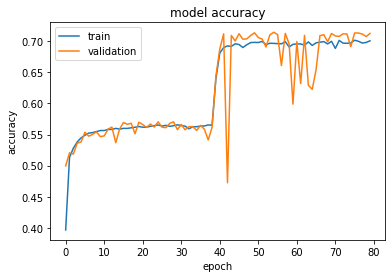

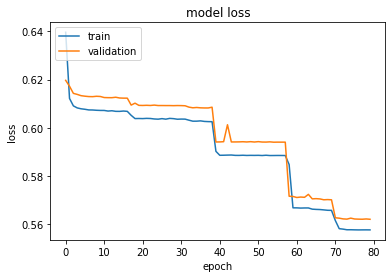

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model2 = tf.keras.models.Sequential()
#start encoder later
model2.add(tf.keras.layers.Dense(units=inputshape, activation='relu'))
model2.add(tf.keras.layers.Dense(units=35, activation='relu'))
model2.add(tf.keras.layers.Dense(units=15, activation='relu'))
model2.add(tf.keras.layers.Dense(units=10, activation='relu'))
model2.add(tf.keras.layers.Dense(units=5, activation='relu'))
#end of encoder and code later
model2.add(tf.keras.layers.Dense(units=10, activation='relu'))
model2.add(tf.keras.layers.Dense(units=15, activation='relu'))
model2.add(tf.keras.layers.Dense(units=35, activation='relu'))
model2.add(tf.keras.layers.Dense(units=inputshape, activation='relu'))

In [ ]:
model2.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [ ]:
 history2=model2.fit(traindata,traindata, validation_data=(valid_data, valid_data),epochs=80,batch_size=256,)

Epoch 1/80
1846/1846 [==============================] - 6s 3ms/step - loss: 0.7315 - accuracy: 0.2368 - val_loss: 0.6344 - val_accuracy: 0.5013
Epoch 2/80
1846/1846 [==============================] - 5s 3ms/step - loss: 0.6299 - accuracy: 0.5003 - val_loss: 0.6312 - val_accuracy: 0.5406
Epoch 3/80
1846/1846 [==============================] - 5s 3ms/step - loss: 0.6250 - accuracy: 0.5291 - val_loss: 0.6285 - val_accuracy: 0.5365
Epoch 4/80
1846/1846 [==============================] - 5s 3ms/step - loss: 0.6267 - accuracy: 0.5295 - val_loss: 0.6268 - val_accuracy: 0.5409
Epoch 5/80
1846/1846 [==============================] - 5s 3ms/step - loss: 0.6285 - accuracy: 0.5394 - val_loss: 0.6262 - val_accuracy: 0.5293
Epoch 6/80
1846/1846 [==============================] - 5s 3ms/step - loss: 0.6229 - accuracy: 0.5461 - val_loss: 0.6222 - val_accuracy: 0.5617
Epoch 7/80
1846/1846 [==============================] - 5s 3ms/step - loss: 0.6239 - accuracy: 0.5559 - val_loss: 0.6223 - val_accuracy:

In [ ]:
model.save('my_model2.h5')

In [ ]:
model3 = tf.keras.models.Sequential()
#start encoder 
model3.add(tf.keras.layers.Dense(units=inputshape, activation='relu'))
#end of encoder-code layer
model3.add(tf.keras.layers.Dense(units=35, activation='relu'))
model3.add(tf.keras.layers.Dense(units=inputshape, activation='relu'))

In [ ]:
model3.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [ ]:
 history3=model3.fit(traindata,traindata, validation_data=(valid_data, valid_data),epochs=80,batch_size=128,)

Epoch 1/80
3691/3691 [==============================] - 7s 2ms/step - loss: 0.6640 - accuracy: 0.6142 - val_loss: 0.6085 - val_accuracy: 0.8343
Epoch 2/80
3691/3691 [==============================] - 6s 2ms/step - loss: 0.6005 - accuracy: 0.8502 - val_loss: 0.6061 - val_accuracy: 0.9061
Epoch 3/80
3691/3691 [==============================] - 7s 2ms/step - loss: 0.5950 - accuracy: 0.8839 - val_loss: 0.6060 - val_accuracy: 0.9188
Epoch 4/80
3691/3691 [==============================] - 7s 2ms/step - loss: 0.5985 - accuracy: 0.8929 - val_loss: 0.6061 - val_accuracy: 0.9172
Epoch 5/80
3691/3691 [==============================] - 6s 2ms/step - loss: 0.6005 - accuracy: 0.8961 - val_loss: 0.6053 - val_accuracy: 0.9313
Epoch 6/80
3691/3691 [==============================] - 6s 2ms/step - loss: 0.6068 - accuracy: 0.9002 - val_loss: 0.6058 - val_accuracy: 0.9190
Epoch 7/80
3691/3691 [==============================] - 6s 2ms/step - loss: 0.5945 - accuracy: 0.9027 - val_loss: 0.6054 - val_accuracy:

In [ ]:
model3.save('my_model3.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


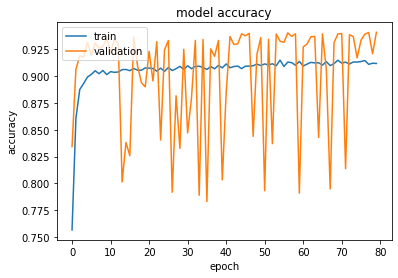

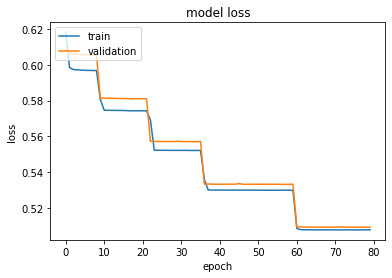

In [ ]:
print(history3.history.keys())
#  "Accuracy"
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [33]:
model3 = tf.keras.models.load_model('my_model3.h5')

In [34]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 45)                2070      
_________________________________________________________________
dense_17 (Dense)             (None, 35)                1610      
_________________________________________________________________
dense_18 (Dense)             (None, 45)                1620      
Total params: 5,300
Trainable params: 5,300
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4 = tf.keras.models.Sequential()
#start encoder layer 
model4.add(tf.keras.layers.Dense(units=inputshape, activation='relu'))
#end of encoder -code layer
model4.add(tf.keras.layers.Dense(units=10, activation='relu'))
model4.add(tf.keras.layers.Dense(units=inputshape, activation='relu'))

In [ ]:
model4.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [ ]:
 history4=model4.fit(traindata,traindata, validation_data=(valid_data, valid_data),epochs=80,batch_size=256,)

Epoch 1/80
1846/1846 [==============================] - 4s 2ms/step - loss: 0.6911 - accuracy: 0.3556 - val_loss: 0.5993 - val_accuracy: 0.6002
Epoch 2/80
1846/1846 [==============================] - 3s 2ms/step - loss: 0.5876 - accuracy: 0.6202 - val_loss: 0.5924 - val_accuracy: 0.6547
Epoch 3/80
1846/1846 [==============================] - 4s 2ms/step - loss: 0.5852 - accuracy: 0.6603 - val_loss: 0.5917 - val_accuracy: 0.6693
Epoch 4/80
1846/1846 [==============================] - 4s 2ms/step - loss: 0.5868 - accuracy: 0.6689 - val_loss: 0.5907 - val_accuracy: 0.6686
Epoch 5/80
1846/1846 [==============================] - 4s 2ms/step - loss: 0.5855 - accuracy: 0.6720 - val_loss: 0.5917 - val_accuracy: 0.6695
Epoch 6/80
1846/1846 [==============================] - 4s 2ms/step - loss: 0.5818 - accuracy: 0.6728 - val_loss: 0.5898 - val_accuracy: 0.6800
Epoch 7/80
1846/1846 [==============================] - 4s 2ms/step - loss: 0.5876 - accuracy: 0.6737 - val_loss: 0.5896 - val_accuracy:

In [ ]:
model4.save('my_model4.h5')


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


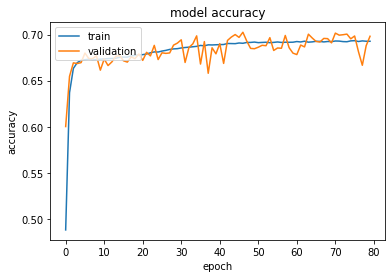

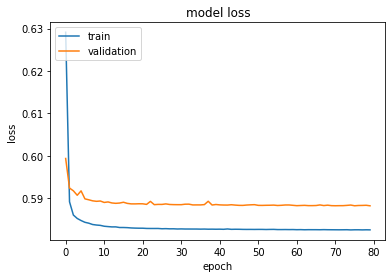

In [ ]:
print(history4.history.keys())
#  "Accuracy"
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [35]:
model4 = tf.keras.models.load_model('my_model4.h5')

In [36]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 45)                2070      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                460       
_________________________________________________________________
dense_21 (Dense)             (None, 45)                495       
Total params: 3,025
Trainable params: 3,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model5= tf.keras.models.Sequential()
#start encoder layer
model5.add(tf.keras.layers.Dense(units=inputshape, activation='relu'))
#end of encoder -code layer
model5.add(tf.keras.layers.Dense(units=15, activation='relu'))
#decoder layer 
model5.add(tf.keras.layers.Dense(units=25, activation='relu'))
model5.add(tf.keras.layers.Dense(units=35, activation='relu'))
model5.add(tf.keras.layers.Dense(units=40, activation='relu'))
model5.add(tf.keras.layers.Dense(units=inputshape, activation='relu'))

In [ ]:
model5.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [ ]:
 history5=model5.fit(traindata,traindata, validation_data=(valid_data, valid_data),epochs=80,batch_size=256,)

Epoch 1/80
1846/1846 [==============================] - 5s 3ms/step - loss: 0.7397 - accuracy: 0.2940 - val_loss: 0.6839 - val_accuracy: 0.4511
Epoch 2/80
1846/1846 [==============================] - 5s 2ms/step - loss: 0.6709 - accuracy: 0.4600 - val_loss: 0.6812 - val_accuracy: 0.4525
Epoch 3/80
1846/1846 [==============================] - 5s 3ms/step - loss: 0.6752 - accuracy: 0.4742 - val_loss: 0.6717 - val_accuracy: 0.5076
Epoch 4/80
1846/1846 [==============================] - 5s 2ms/step - loss: 0.6662 - accuracy: 0.5028 - val_loss: 0.6710 - val_accuracy: 0.5191
Epoch 5/80
1846/1846 [==============================] - 5s 3ms/step - loss: 0.6646 - accuracy: 0.5083 - val_loss: 0.6697 - val_accuracy: 0.5193
Epoch 6/80
1846/1846 [==============================] - 5s 3ms/step - loss: 0.6601 - accuracy: 0.5306 - val_loss: 0.6656 - val_accuracy: 0.5358
Epoch 7/80
1846/1846 [==============================] - 5s 2ms/step - loss: 0.6596 - accuracy: 0.5395 - val_loss: 0.6654 - val_accuracy:

In [ ]:
model5.save('my_model5.h5')


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


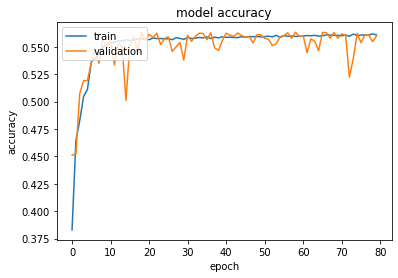

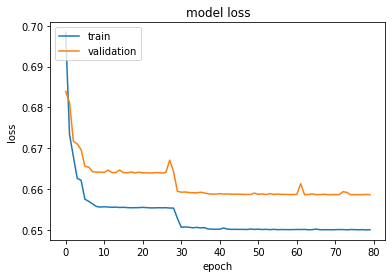

In [ ]:
print(history5.history.keys())
#  "Accuracy"
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [41]:
model5= tf.keras.models.load_model('my_model5.h5')

In [42]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 45)                2070      
_________________________________________________________________
dense_23 (Dense)             (None, 15)                690       
_________________________________________________________________
dense_24 (Dense)             (None, 25)                400       
_________________________________________________________________
dense_25 (Dense)             (None, 35)                910       
_________________________________________________________________
dense_26 (Dense)             (None, 40)                1440      
_________________________________________________________________
dense_27 (Dense)             (None, 45)                1845      
Total params: 7,355
Trainable params: 7,355
Non-trainable params: 0
____________________________________________________

In [39]:
model5.save('my_model5.h5')

In [ ]:
model6= tf.keras.models.Sequential()
#start encoder 
model6.add(tf.keras.layers.Dense(units=inputshape, activation='relu'))
model6.add(tf.keras.layers.Dense(units=40, activation='relu'))
model6.add(tf.keras.layers.Dense(units=35, activation='relu'))
#end of encdoer -code layer
model6.add(tf.keras.layers.Dense(units=25, activation='relu'))
#decodr layer
model6.add(tf.keras.layers.Dense(units=inputshape, activation='relu'))

In [ ]:
model6.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [ ]:
 history6=model6.fit(traindata,traindata, validation_data=(valid_data, valid_data),epochs=80,batch_size=256,)

Epoch 1/80
1846/1846 [==============================] - 5s 2ms/step - loss: 0.6314 - accuracy: 0.4812 - val_loss: 0.5681 - val_accuracy: 0.6905
Epoch 2/80
1846/1846 [==============================] - 5s 2ms/step - loss: 0.5612 - accuracy: 0.6962 - val_loss: 0.5614 - val_accuracy: 0.7318
Epoch 3/80
1846/1846 [==============================] - 4s 2ms/step - loss: 0.5545 - accuracy: 0.7283 - val_loss: 0.5605 - val_accuracy: 0.7300
Epoch 4/80
1846/1846 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.7430 - val_loss: 0.5557 - val_accuracy: 0.7480
Epoch 5/80
1846/1846 [==============================] - 4s 2ms/step - loss: 0.5527 - accuracy: 0.7660 - val_loss: 0.5554 - val_accuracy: 0.7734
Epoch 6/80
1846/1846 [==============================] - 4s 2ms/step - loss: 0.5478 - accuracy: 0.7671 - val_loss: 0.5528 - val_accuracy: 0.7602
Epoch 7/80
1846/1846 [==============================] - 5s 3ms/step - loss: 0.5461 - accuracy: 0.7674 - val_loss: 0.5527 - val_accuracy:

In [ ]:
model6.save('my_model6.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


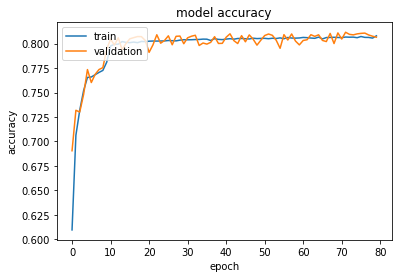

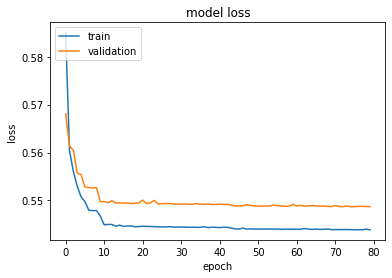

In [ ]:
print(history6.history.keys())
#  "Accuracy"
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [43]:
model6= tf.keras.models.load_model('my_model6.h5')

In [44]:
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 45)                2070      
_________________________________________________________________
dense_29 (Dense)             (None, 40)                1840      
_________________________________________________________________
dense_30 (Dense)             (None, 35)                1435      
_________________________________________________________________
dense_31 (Dense)             (None, 25)                900       
_________________________________________________________________
dense_32 (Dense)             (None, 45)                1170      
Total params: 7,415
Trainable params: 7,415
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.keras.layers.Dropout(rate=0.3)

In [ ]:
model7= tf.keras.models.Sequential()
#start encoder 
model7.add(tf.keras.layers.Dense(units=inputshape, activation='relu'))
model7.add(tf.keras.layers.Dropout(rate=0.3))
#end of encoder-code layer
model7.add(tf.keras.layers.Dense(units=25, activation='relu'))
#decoder layer
model7.add(tf.keras.layers.Dropout(rate=0.3))
model7.add(tf.keras.layers.Dense(units=inputshape, activation='relu'))

In [ ]:
model7.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [ ]:
 history7=model7.fit(traindata,traindata, validation_data=(valid_data, valid_data),epochs=80,batch_size=128,)

Epoch 1/80
3691/3691 [==============================] - 8s 2ms/step - loss: 0.7116 - accuracy: 0.2069 - val_loss: 0.5335 - val_accuracy: 0.4035
Epoch 2/80
3691/3691 [==============================] - 7s 2ms/step - loss: 0.5697 - accuracy: 0.3569 - val_loss: 0.5158 - val_accuracy: 0.4737
Epoch 3/80
3691/3691 [==============================] - 7s 2ms/step - loss: 0.5587 - accuracy: 0.4214 - val_loss: 0.5143 - val_accuracy: 0.5024
Epoch 4/80
3691/3691 [==============================] - 7s 2ms/step - loss: 0.5553 - accuracy: 0.4828 - val_loss: 0.5146 - val_accuracy: 0.4971
Epoch 5/80
3691/3691 [==============================] - 7s 2ms/step - loss: 0.5504 - accuracy: 0.4938 - val_loss: 0.5198 - val_accuracy: 0.4952
Epoch 6/80
3691/3691 [==============================] - 7s 2ms/step - loss: 0.5509 - accuracy: 0.5003 - val_loss: 0.5152 - val_accuracy: 0.5007
Epoch 7/80
3691/3691 [==============================] - 7s 2ms/step - loss: 0.5531 - accuracy: 0.5031 - val_loss: 0.5113 - val_accuracy:

In [ ]:
model7.save('my_model7.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


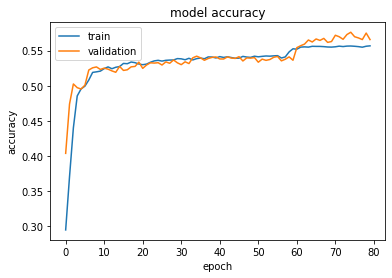

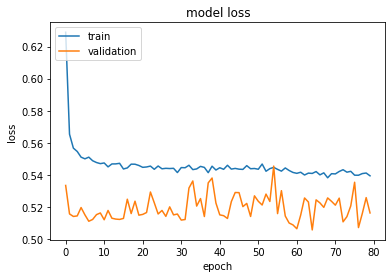

In [ ]:
print(history7.history.keys())
#  "Accuracy"
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [45]:
model7= tf.keras.models.load_model('my_model7.h5')

In [46]:
model7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 45)                2070      
_________________________________________________________________
dropout (Dropout)            (None, 45)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 25)                1150      
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 45)                1170      
Total params: 4,390
Trainable params: 4,390
Non-trainable params: 0
_________________________________________________________________


In [67]:
finalmodel = tf.keras.models.load_model('my_model3.h5')

In [68]:
finalmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 45)                2070      
_________________________________________________________________
dense_17 (Dense)             (None, 35)                1610      
_________________________________________________________________
dense_18 (Dense)             (None, 45)                1620      
Total params: 5,300
Trainable params: 5,300
Non-trainable params: 0
_________________________________________________________________


In [65]:
traindata, testdata,trainfraud, testfraud

(           card1     card2     addr1  ...        M2        M8        C7
 0       1.560480 -0.282609 -0.924442  ... -0.673300 -0.373860 -0.046171
 1      -1.732478 -1.600932  0.051508  ... -0.673300 -1.532493 -0.046171
 2      -0.377303 -0.282609  0.148296  ... -0.673300 -0.373860 -0.046171
 3      -1.148084 -1.632320 -1.416449  ...  1.004771  0.784774 -0.046171
 4      -0.451023 -0.037777 -1.085756  ... -0.673300 -0.373860 -0.046171
 ...          ...       ...       ...  ...       ...       ...       ...
 472427 -1.479724 -1.651154  1.793699  ...  1.004771  0.784774 -0.013687
 472428  1.311302  0.690439  0.043442  ... -0.673300 -1.532493 -0.046171
 472429  1.484971 -0.728327  0.987129  ... -2.351371 -1.532493 -0.046171
 472430  1.551935  0.772050  0.051508  ... -0.673300  0.784774 -0.046171
 472431  0.598941  1.368434  0.987129  ...  1.004771  0.784774 -0.046171
 
 [472432 rows x 45 columns],
            card1     card2     addr1  ...        M2        M8        C7
 0       0.527208  0

In [ ]:
print(testdata)

           card1     card2     addr1  ...        M2        M8        C7
0       0.527208  0.207054  0.987129  ...  1.004771  0.784774 -0.046171
1       1.115775  0.665328 -0.069478  ... -0.673300 -1.532493 -0.046171
2      -0.561106  1.186380  0.051508  ...  1.004771  0.784774 -0.046171
3       0.245244  0.238443 -1.416449  ... -0.673300 -0.373860 -0.046171
4      -0.267418  0.928993  0.091836  ... -0.673300 -0.373860 -0.046171
...          ...       ...       ...  ...       ...       ...       ...
118103 -1.127220 -0.282609 -0.440500  ... -0.673300 -0.373860 -0.046171
118104 -1.604909  1.362156 -0.924442  ...  1.004771  0.784774 -0.046171
118105 -0.000556  0.721828 -0.158200  ...  1.004771  0.784774 -0.046171
118106 -0.522159  0.320053  0.091836  ... -0.673300 -1.532493 -0.046171
118107  1.262023  0.778328  0.817750  ... -0.673300 -0.373860 -0.046171

[118108 rows x 45 columns]


In [ ]:
print(testdata)

           card1     card2     addr1  ...        M2        M8        C7
0       0.527208  0.207054  0.987129  ...  1.004771  0.784774 -0.046171
1       1.115775  0.665328 -0.069478  ... -0.673300 -1.532493 -0.046171
2      -0.561106  1.186380  0.051508  ...  1.004771  0.784774 -0.046171
3       0.245244  0.238443 -1.416449  ... -0.673300 -0.373860 -0.046171
4      -0.267418  0.928993  0.091836  ... -0.673300 -0.373860 -0.046171
...          ...       ...       ...  ...       ...       ...       ...
118103 -1.127220 -0.282609 -0.440500  ... -0.673300 -0.373860 -0.046171
118104 -1.604909  1.362156 -0.924442  ...  1.004771  0.784774 -0.046171
118105 -0.000556  0.721828 -0.158200  ...  1.004771  0.784774 -0.046171
118106 -0.522159  0.320053  0.091836  ... -0.673300 -1.532493 -0.046171
118107  1.262023  0.778328  0.817750  ... -0.673300 -0.373860 -0.046171

[118108 rows x 45 columns]


In [69]:
predictions = finalmodel.predict(testdata)

In [70]:
print(predictions)
print(predictions.shape)


[[0.5211446  0.18461716 0.9703223  ... 1.0025102  0.78843105 0.        ]
 [1.1145316  0.66791165 0.         ... 0.         0.         0.        ]
 [0.         1.1901551  0.05604339 ... 1.0105565  0.7908773  0.        ]
 ...
 [0.         0.7139809  0.         ... 1.0089058  0.78519535 0.        ]
 [0.         0.29829758 0.08785291 ... 0.         0.         0.        ]
 [1.2588147  0.7668091  0.8129151  ... 0.         0.         0.        ]]
(118108, 45)


In [71]:
mean_error = np.mean(np.power(testdata - predictions, 2), axis=1)

In [72]:
print(mean_error)

0         1.639781
1         0.167491
2         1.405305
3         0.405591
4         0.255437
            ...   
118103    0.159711
118104    0.940994
118105    0.104598
118106    0.136248
118107    0.348515
Length: 118108, dtype: float64


In [78]:
  error_data = pd.DataFrame(mean_error).join(testfraud)

In [79]:
print(error_data)

               0  isFraud
0       1.639781        0
1       0.167491        0
2       1.405305        0
3       0.405591        0
4       0.255437        0
...          ...      ...
118103  0.159711        0
118104  0.940994        0
118105  0.104598        0
118106  0.136248        0
118107  0.348515        1

[118108 rows x 2 columns]


In [80]:
  error_data = error_data.rename(columns = {0:"reconstruction_error", "isFraud":"true_class"})


In [81]:
print(error_data)

        reconstruction_error  true_class
0                   1.639781           0
1                   0.167491           0
2                   1.405305           0
3                   0.405591           0
4                   0.255437           0
...                      ...         ...
118103              0.159711           0
118104              0.940994           0
118105              0.104598           0
118106              0.136248           0
118107              0.348515           1

[118108 rows x 2 columns]


In [82]:
  print("true_class = 1.0")
  print(error_data[error_data.true_class == 1.0].describe())
  print(" ")
  print("true_class = 0.0")
  print(error_data[error_data.true_class == 0.0].describe())
  print(" ")

true_class = 1.0
       reconstruction_error  true_class
count           4188.000000      4188.0
mean               0.755525         1.0
std                0.833135         0.0
min                0.009569         1.0
25%                0.285926         1.0
50%                0.694410         1.0
75%                1.005163         1.0
max               31.049332         1.0
 
true_class = 0.0
       reconstruction_error  true_class
count         113920.000000    113920.0
mean               0.502039         0.0
std                0.839929         0.0
min                0.002865         0.0
25%                0.165268         0.0
50%                0.269011         0.0
75%                0.646326         0.0
max               31.351878         0.0
 


isFraud = 1.0
       error_after_prediction  isFraud
count             4188.000000   4188.0
mean                 0.755525      1.0
std                  0.833135      0.0
min                  0.009569      1.0
25%                  0.285926      1.0
50%                  0.694410      1.0
75%                  1.005163      1.0
max                 31.049332      1.0
 
isFraud = 0.0
       error_after_prediction   isFraud
count           113920.000000  113920.0
mean                 0.502039       0.0
std                  0.839929       0.0
min                  0.002865       0.0
25%                  0.165268       0.0
50%                  0.269011       0.0
75%                  0.646326       0.0
max                 31.351878       0.0
 


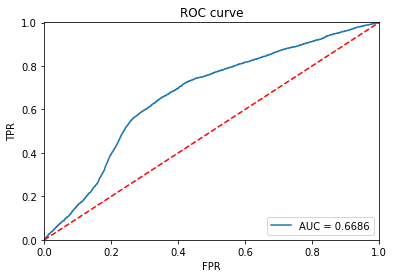

        error_after_prediction            ...                     
                         count      mean  ...       75%        max
isFraud                                   ...                     
0                     113920.0  0.502039  ...  0.646326  31.351878
1                       4188.0  0.755525  ...  1.005163  31.049332

[2 rows x 8 columns]


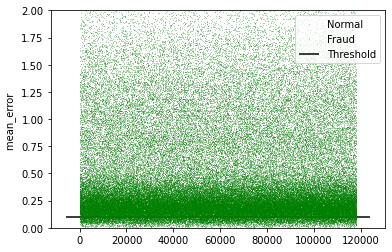

        error_after_prediction            ...                     
                         count      mean  ...       75%        max
isFraud                                   ...                     
0                     113920.0  0.502039  ...  0.646326  31.351878
1                       4188.0  0.755525  ...  1.005163  31.049332

[2 rows x 8 columns]


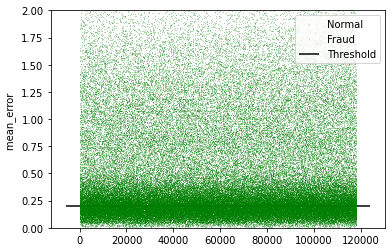

        error_after_prediction            ...                     
                         count      mean  ...       75%        max
isFraud                                   ...                     
0                     113920.0  0.502039  ...  0.646326  31.351878
1                       4188.0  0.755525  ...  1.005163  31.049332

[2 rows x 8 columns]


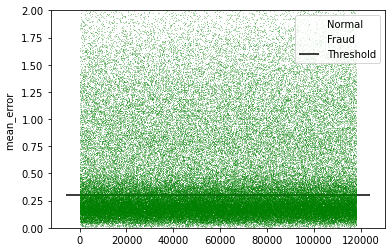

        error_after_prediction            ...                     
                         count      mean  ...       75%        max
isFraud                                   ...                     
0                     113920.0  0.502039  ...  0.646326  31.351878
1                       4188.0  0.755525  ...  1.005163  31.049332

[2 rows x 8 columns]


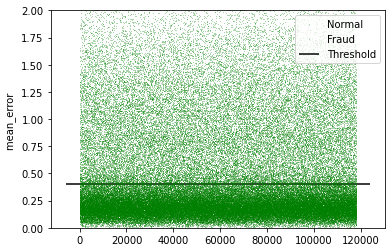

        error_after_prediction            ...                     
                         count      mean  ...       75%        max
isFraud                                   ...                     
0                     113920.0  0.502039  ...  0.646326  31.351878
1                       4188.0  0.755525  ...  1.005163  31.049332

[2 rows x 8 columns]


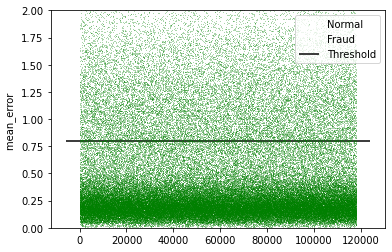

In [85]:
from sklearn.metrics import (confusion_matrix , roc_curve,auc, )


mean_error = np.mean(np.power(testdata - predictions, 2), axis=1)

error_data = pd.DataFrame(mean_error).join(testfraud)
error_data = error_data.rename(columns = {0:"error_after_prediction", "isFraud":"isFraud"})

  
print("isFraud = 1.0")
print(error_data[error_data.isFraud == 1.0].describe())
print(" ")
print("isFraud = 0.0")
print(error_data[error_data.isFraud == 0.0].describe())
print(" ")

fpr, tpr, thresholds = roc_curve(error_data.isFraud, error_data.error_after_prediction)
roc_auc = auc(fpr, tpr)

plt.title('ROC curve')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show();
value_of_thresholds = [0.1,0.2, 0.3,0.4,0.8]
# print(error_data)  
for threshold in value_of_thresholds:
      
  error_data_final = error_data.groupby('isFraud')
  fig, ax = plt.subplots()
  print(error_data.groupby('isFraud').describe())

  for name, er in error_data_final:
      # print(er.reconstruction_error)
      ax.plot(er.index, er.error_after_prediction, marker='v',color='green', ms=0.1, linestyle='',
              label= "Fraud" if name == 1 else "Normal")
  ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="black", label='Threshold')
  ax.legend()
  ax.set_ylim(0, 2.0) 
  plt.ylabel("mean_error ") 
  plt.show()
      # Confusion matrix
  y_pred = [1 if error > 0.4 else 0 for error in error_data.error_after_prediction.values]
  cm = confusion_matrix(error_data.isFraud, y_pred)
# print(value_of_thresholds)
      


   

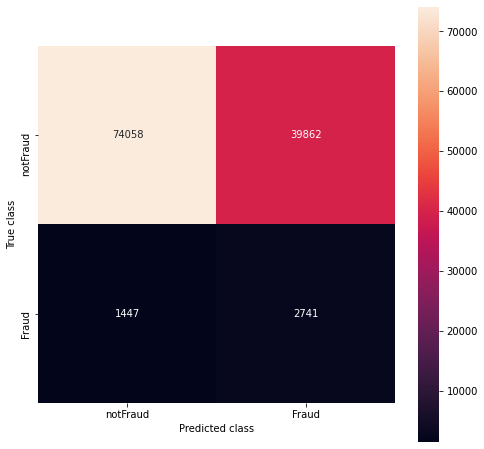

In [86]:

plt.figure(figsize=(8, 8))
LABELS = ["notFraud", "Fraud"]
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", square = True);
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()